<h1> Исследование данных Train.csv и Test_1.csv </h1>

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv', sep=';', dtype={'Source': np.object, 'Destination': np.object,  
                                                     'Protocol': np.object, 'Length': np.int64, 'Source Port': np.int64,
                                                     'Dest Port': np.int64, 'Delta time': np.float64, 'Error': np.object})

In [15]:
train_data = train_data.fillna('delivered')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269126 entries, 0 to 269125
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              269126 non-null  object 
 1   Destination         269126 non-null  object 
 2   Protocol            269126 non-null  object 
 3   Length              269126 non-null  int64  
 4   Source Port         269126 non-null  int64  
 5   Dest Port           269126 non-null  int64  
 6   Delta time          269126 non-null  float64
 7   Error               269126 non-null  object 
 8   Category_error_dic  269126 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 18.5+ MB


In [4]:
#Функция для перемешивания строк
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [5]:
train_data.head()

,Source,Destination,Protocol,Length,Source Port,Dest Port,Delta time,Error
0,10.0.17.129,10.0.4.66,TCP,2966,36384,445,0.000003,tcp_out_of_order
1,10.0.17.129,10.0.4.66,TCP,1518,36384,445,0.000001,retransmition
2,10.0.4.66,10.0.17.129,TCP,70,445,36384,0.000001,delivered
3,10.0.4.66,10.0.17.129,TCP,70,445,36384,0.000122,delivered
4,10.0.16.7,10.0.151.32,TCP,64,59181,554,0.000002,duplicate_ack


<h4>Введение словаря для ошибок</h4>

In [7]:
сategories = {}

for key, value in enumerate(train_data['Error'].unique()):
    categories[value] = key + 1

train_data['Category_error_dic'] = train_data['Error'].map(categories)
train_data.corr()

,Length,Source Port,Dest Port,Delta time,Category_error_dic
Length,1.000000,0.636776,-0.749304,-0.274363,-0.929411
Source Port,0.636776,1.000000,-0.896721,-0.102307,-0.558648
Dest Port,-0.749304,-0.896721,1.000000,0.124476,0.629226
Delta time,-0.274363,-0.102307,0.124476,1.000000,0.317912
Category_error_dic,-0.929411,-0.558648,0.629226,0.317912,1.000000


<AxesSubplot:>

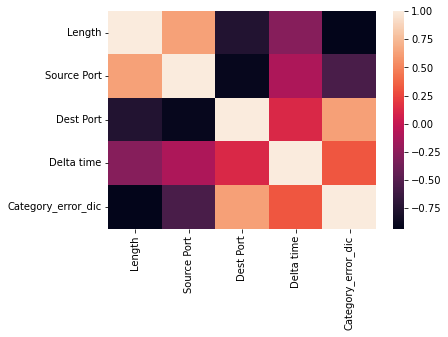

In [14]:
sns.heatmap(train_data.corr())